## Plot Metrics ##

This script plots MSE metrics collected from all benchmarks to be used in the final report.


In [42]:
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
df_metrics = pd.read_csv("../docs/mse-summary.csv")

df_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Architecture  4 non-null      object 
 1   NYU v2        4 non-null      float64
 2   DIML Indoor   4 non-null      float64
 3   DIML Outdoor  4 non-null      float64
 4   Middleburry   4 non-null      float64
dtypes: float64(4), object(1)
memory usage: 288.0+ bytes


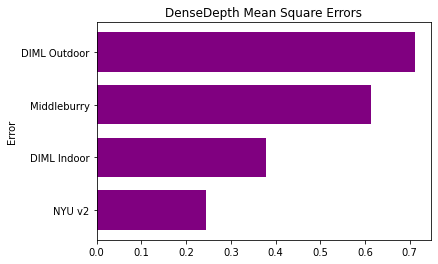

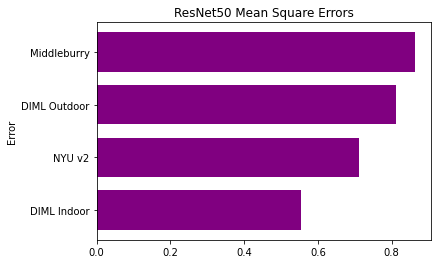

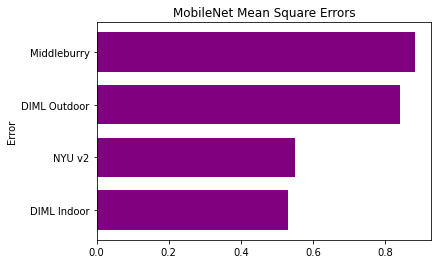

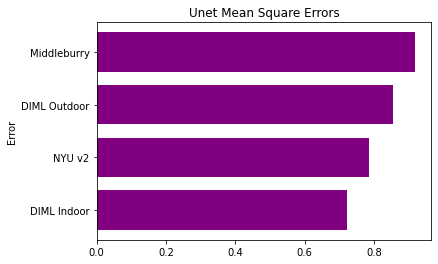

In [44]:
# Generate one bar plot for each network architecture
for _, row in df_metrics.iterrows():

    arch = row["Architecture"]
    errors = row[1:].sort_values()
    plt.ylabel("Error")
    plt.title(arch + " Mean Square Errors")
    plt.barh(y=range(len(row) - 1), width=errors.values,
             height=0.75, tick_label=errors.keys(), color="purple")

    plt.savefig("../docs/bar-mse-" + arch.lower() + ".png")
    plt.show()